In [1]:
import os
import numpy as np
import pandas as pd

file = os.path.join('data', 'Iris_Data.csv')
data = pd.read_csv(file)

In [3]:
data[:3]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


1.

In [4]:
data.shape

(150, 5)

In [48]:
columns = data.columns
columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [6]:
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [52]:
dimensions = columns[:-1]
dimensions

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

2.

In [9]:
data.species = data.species.str.replace('Iris-', '')

3.

In [11]:
data.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [46]:
describe = data.describe()
range_ = pd.DataFrame(describe.loc['max']-describe.loc['min'], columns = ['range']).transpose()
pd.concat([describe, range_])

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000
range,3.600000,2.400000,5.900000,2.400000


In [12]:
data.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [13]:
data.groupby('species').median()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.0,3.4,1.50,0.2
versicolor,5.9,2.8,4.35,1.3
virginica,6.5,3.0,5.55,2.0


In [53]:
data.groupby('species').quantile([0.25, 0.5, 0.75])[dimensions]

sepal_length  sepal_width  petal_length  petal_width
species                                                              
setosa     0.25         4.800        3.125         1.400          0.2
           0.50         5.000        3.400         1.500          0.2
           0.75         5.200        3.675         1.575          0.3
versicolor 0.25         5.600        2.525         4.000          1.2
           0.50         5.900        2.800         4.350          1.3
           0.75         6.300        3.000         4.600          1.5
virginica  0.25         6.225        2.800         5.100          1.8
           0.50         6.500        3.000         5.550          2.0
           0.75         6.900        3.175         5.875          2.3

In [57]:
data.groupby('species').max() - data.groupby('species').min()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,1.5,2.1,0.9,0.5
versicolor,2.1,1.4,2.1,0.8
virginica,3.0,1.6,2.4,1.1


4.

In [58]:
# The mean calculation
data.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [59]:
# The median calculation
data.groupby('species').median()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.0,3.4,1.50,0.2
versicolor,5.9,2.8,4.35,1.3
virginica,6.5,3.0,5.55,2.0


In [60]:
# applying multiple functions at once - 2 methods

data.groupby('species').agg(['mean', 'median'])  # passing a list of recognized strings
data.groupby('species').agg([np.mean, np.median])  # passing a list of explicit aggregation functions

sepal_length        sepal_width        petal_length         \
                   mean median        mean median         mean median   
species                                                                 
setosa            5.006    5.0       3.418    3.4        1.464   1.50   
versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
virginica         6.588    6.5       2.974    3.0        5.552   5.55   

           petal_width         
                  mean median  
species                        
setosa           0.244    0.2  
versicolor       1.326    1.3  
virginica        2.026    2.0

In [64]:
# If certain fields need to be aggregated differently, we can do:
from pprint import pprint

agg_dict = {field: ['mean', 'median'] for field in data.columns if field != 'species'}
agg_dict['petal_length'] = 'max'
pprint(agg_dict)
data.groupby('species').agg(agg_dict)

{'petal_length': 'max',
 'petal_width': ['mean', 'median'],
 'sepal_length': ['mean', 'median'],
 'sepal_width': ['mean', 'median']}


sepal_length        sepal_width        petal_length petal_width  \
                   mean median        mean median          max        mean   
species                                                                      
setosa            5.006    5.0       3.418    3.4          1.9       0.244   
versicolor        5.936    5.9       2.770    2.8          5.1       1.326   
virginica         6.588    6.5       2.974    3.0          6.9       2.026   

                   
           median  
species            
setosa        0.2  
versicolor    1.3  
virginica     2.0

5.

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline

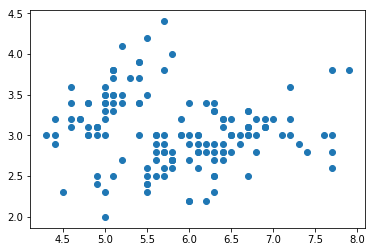

In [74]:
ax = plt.axes()
ax.scatter(data.sepal_length, data.sepal_width)
plt.show()

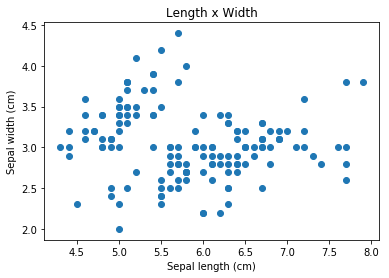

In [76]:
ax = plt.axes()
ax.scatter(data.sepal_length, data.sepal_width)
ax.set(xlabel='Sepal length (cm)')
ax.set(ylabel='Sepal width (cm)')
ax.set(title='Length x Width')
plt.show()

In [86]:
data[['sepal_length','sepal_width']][:3]

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2


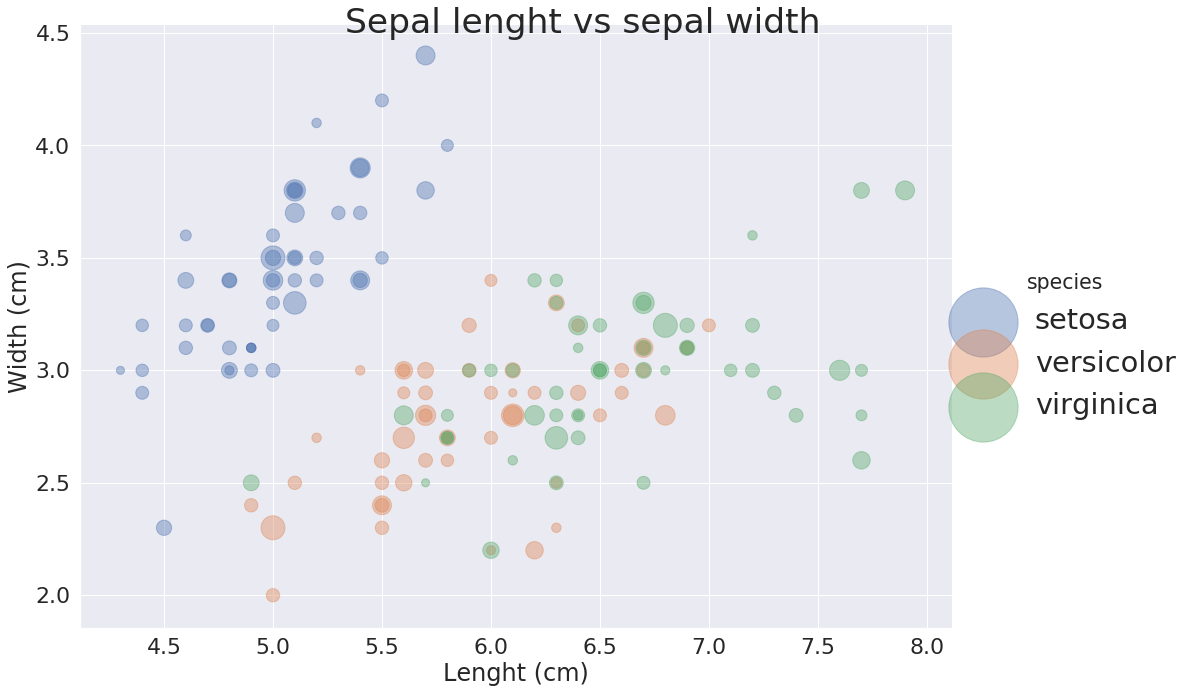

In [273]:
import seaborn as sns
sns.set(font_scale=2)

face_grid = sns.FacetGrid(data=data[['sepal_length', 'sepal_width','species']],\
                          hue='species',\
                          height=10,\
                          aspect=1.4
                         )
face_grid.map(plt.scatter, 'sepal_length', 'sepal_width', alpha=0.4,\
              s=(data.petal_length*data.petal_width*6E2)).add_legend(fontsize='large')
face_grid.set_axis_labels('Lenght (cm)', 'Width (cm)')
face_grid.fig.suptitle('Sepal lenght vs sepal width', fontsize='x-large')
plt.show()

# title?

#### 6.

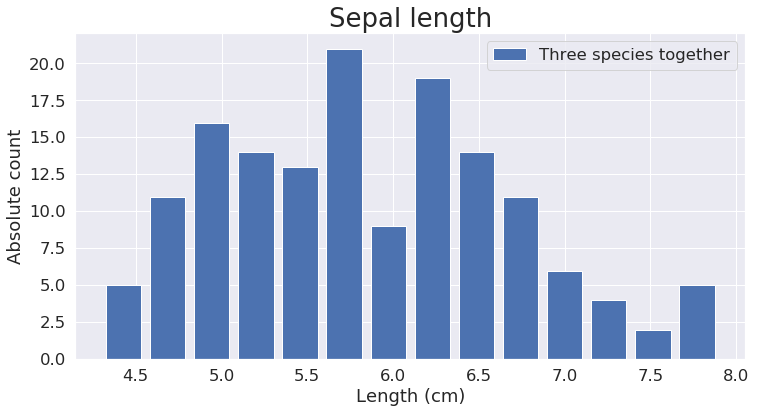

In [232]:
sns.set(font_scale=1.5)
plt.figure(figsize=(12,6))
ax = plt.axes()
plt.hist(data.sepal_length, bins=14, rwidth=0.8, alpha=1, label='Three species together')
plt.legend()
plt.title("Sepal length", fontsize='x-large')
ax.set(xlabel = 'Length (cm)')
ax.set(ylabel = 'Absolute count')

plt.show()

7.

In [233]:
data.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

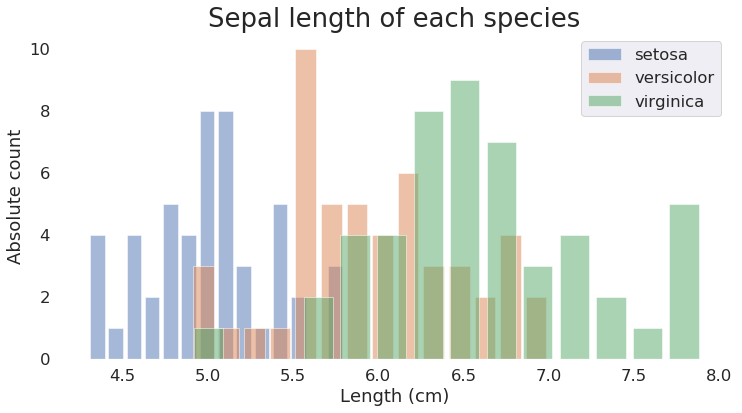

In [251]:
sns.set(font_scale=1.5)
plt.figure(figsize=(12,6))
ax = plt.axes()
plt.hist(data[data.species == 'setosa'].sepal_length, bins=14, rwidth=0.8, alpha=0.5, label='setosa')
plt.hist(data[data.species == 'versicolor'].sepal_length, bins=14, rwidth=0.8, alpha=0.5, label='versicolor')
plt.hist(data[data.species == 'virginica'].sepal_length, bins=14, rwidth=0.8,alpha=0.5, label='virginica')
plt.legend()
plt.title("Sepal length of each species", fontsize='x-large')
ax.set(xlabel = 'Length (cm)')
ax.set(ylabel = 'Absolute count')
ax.set_facecolor('xkcd:white') # https://xkcd.com/color/rgb/

plt.show()

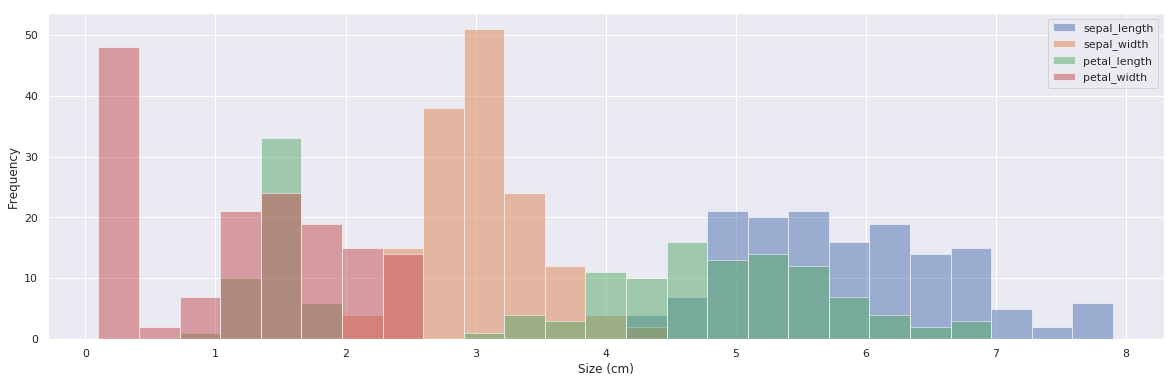

In [245]:
import seaborn as sns

sns.set_context('notebook')

# This uses the `.plot.hist` method
ax = data.plot.hist(bins=25, alpha=0.5)
ax.set_xlabel('Size (cm)');

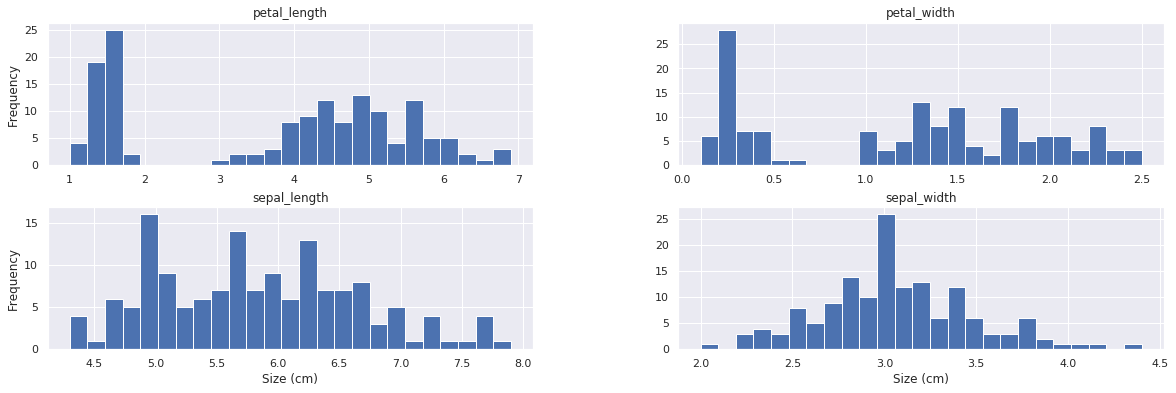

In [246]:
# To create four separate plots, use Pandas `.hist` method
axList = data.hist(bins=25)

# Add some x- and y- labels to first column and last row
for ax in axList.flatten():
    if ax.is_last_row():
        ax.set_xlabel('Size (cm)')
        
    if ax.is_first_col():
        ax.set_ylabel('Frequency')

8.

In [290]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

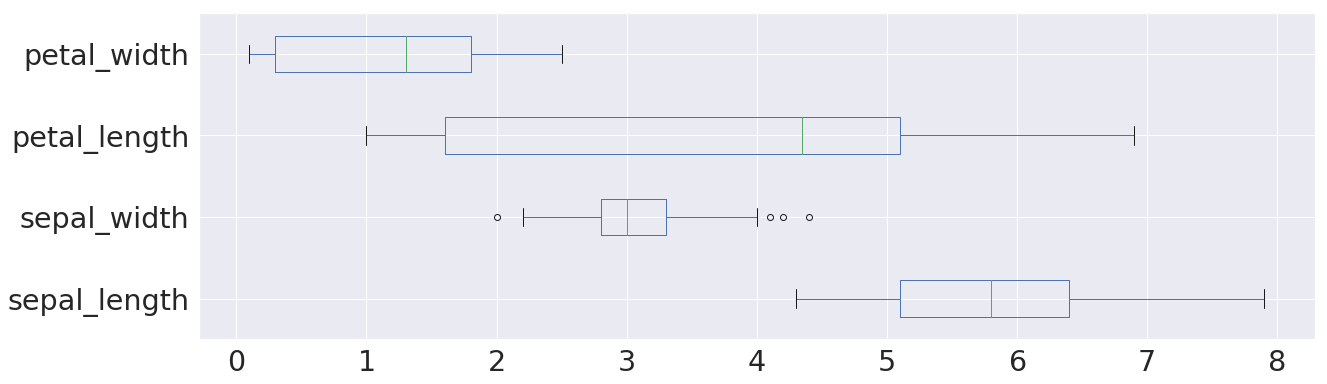

In [323]:
sns.set(font_scale=2.6)
data.plot.box(vert=False)
plt.show()

9.

In [ ]:
data.stack()

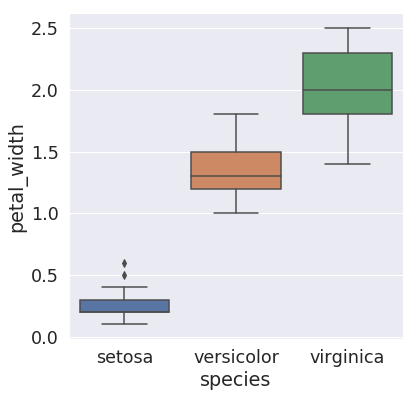

In [325]:
sns.set(style="whitegrid")
sns.set(font_scale=1.6)
f = plt.figure(figsize=(6,6))
sns.boxplot(x='species', y='petal_width', data=data)
plt.show()

In [301]:
data.set_index('species')[:5]

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.1,3.5,1.4,0.2
setosa,4.9,3.0,1.4,0.2
setosa,4.7,3.2,1.3,0.2
setosa,4.6,3.1,1.5,0.2
setosa,5.0,3.6,1.4,0.2


In [302]:
data.set_index('species').stack()[:5]

species              
setosa   sepal_length    5.1
         sepal_width     3.5
         petal_length    1.4
         petal_width     0.2
         sepal_length    4.9
dtype: float64

In [312]:
intermediate = data.set_index('species').stack().to_frame().reset_index()
intermediate[:5]

,species,level_1,0
0,setosa,sepal_length,5.1
1,setosa,sepal_width,3.5
2,setosa,petal_length,1.4
3,setosa,petal_width,0.2
4,setosa,sepal_length,4.9


In [313]:
intermediate.columns

Index(['species', 'level_1', 0], dtype='object')

In [328]:
plot_data = intermediate.rename(columns={0: 'size', 'level_1': 'measurement'})
plot_data[:5]

,species,measurement,size
0,setosa,sepal_length,5.1
1,setosa,sepal_width,3.5
2,setosa,petal_length,1.4
3,setosa,petal_width,0.2
4,setosa,sepal_length,4.9


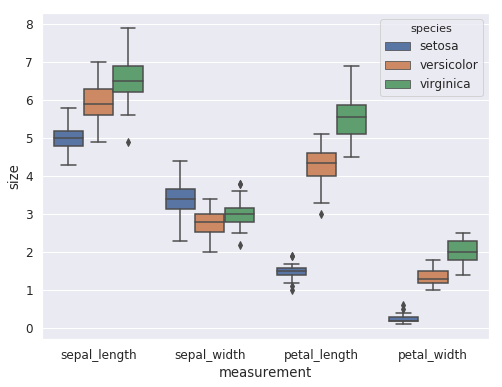

In [335]:
# Now plot the dataframe from above using Seaborn

sns.set_style('white')
sns.set_context('notebook')
sns.set_palette('dark')
sns.set(font_scale=1.1)

f = plt.figure(figsize=(8,6))
sns.boxplot(x='measurement', y='size', 
            hue='species', data=plot_data);

10.

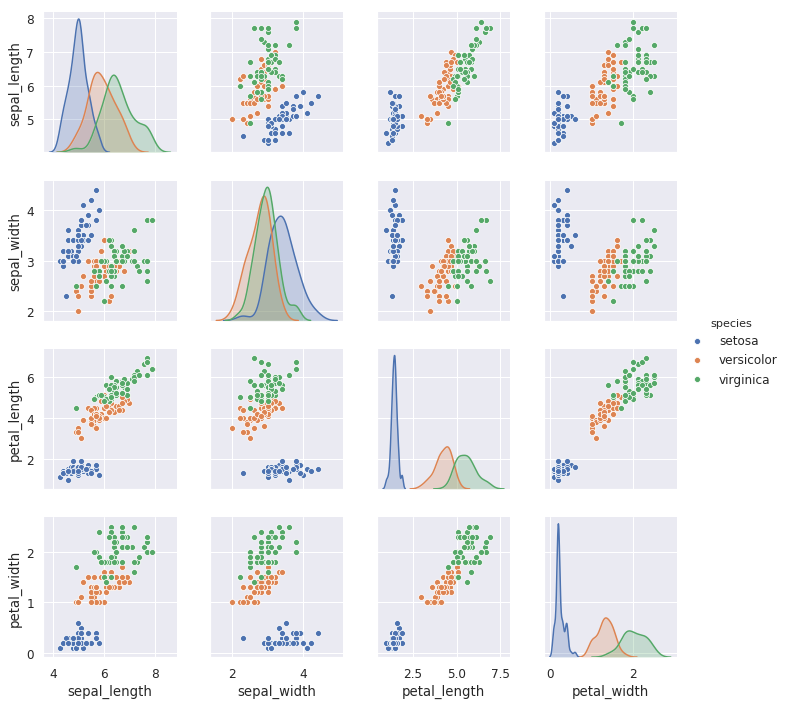

In [339]:
sns.pairplot(data, hue='species')
plt.show()